In [1]:
import pyam
import numpy as np
import plotly

<IPython.core.display.Javascript object>

## Import data with pyam

Documentation of the pyam package is found at: https://pyam-iamc.readthedocs.io/en/stable/index.html

In [2]:
df_early = pyam.IamDataFrame(data='uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_Early and Steady.xlsx')
df_late = pyam.IamDataFrame(data='uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_Late and Rapid.xlsx')
df_dh = pyam.IamDataFrame(data='uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_District heating expansion.xlsx')
df_transport = pyam.IamDataFrame(data='uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_Including road and rail transport.xlsx')
df_transmission = pyam.IamDataFrame(data='uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_Transmission expansion after 2030.xlsx')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_Early and Steady.xlsx
numexpr.utils - INFO: NumExpr defaulting to 8 threads.
pyam.core - INFO: Reading file uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_Late and Rapid.xlsx
pyam.core - INFO: Reading file uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_District heating expansion.xlsx
pyam.core - INFO: Reading file uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_Including road and rail transport.xlsx
pyam.core - INFO: Reading file uploaded_to_EU_Climate_Advisory_Board_Scenario_Explorer/IPCC_AR6_WG3_Global_sectoral_Pathways_scenario_template_v3.1_Transmission ex

In [3]:
df = df_early.append(df_late)
df = df.append(df_dh)
df = df.append(df_transport)
df = df.append(df_transmission)

## Plotting

In [4]:
data = df.aggregate_region(variable='Secondary Energy|Electricity|Wind',region='EU')
data.variable

/Users/au518895/anaconda3/envs/pypsa-eur/lib/python3.7/site-packages/pyam/index.py:37: FutureWarning: Conversion of the second argument of issubdtype from `'bool'` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype('bool').type`.
  if np.issubdtype(matches.dtype, "bool"):


['Capacity |Electricity|Solar|PV|Rooftop PV']

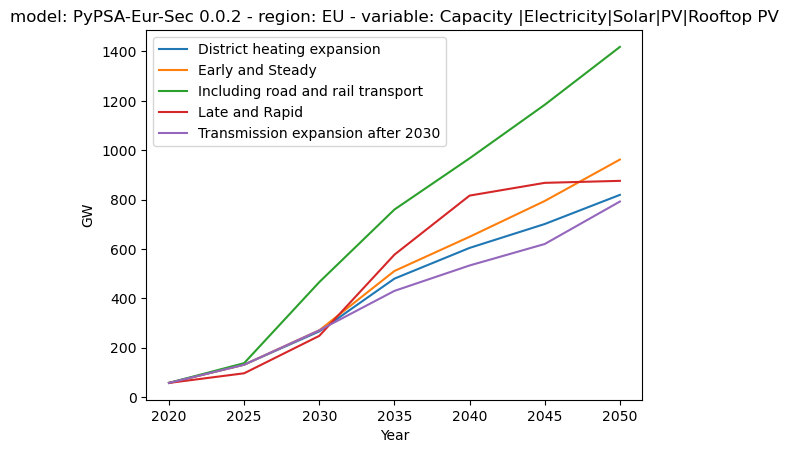

In [5]:
data.plot(color='scenario')

In [38]:
sankey_mapping = {
    "Primary Energy|Coal": ("Coal Mining", "Coal Trade & Power Generation"),
    "Primary Energy|Gas": ("Natural Gas Extraction", "Gas Network & Power Generation"),
    "Secondary Energy|Electricity|Non-Biomass Renewables": (
        "Non-Biomass Renewables",
        "Electricity Grid",
    ),
    "Secondary Energy|Electricity|Nuclear": ("Nuclear", "Electricity Grid"),
    "Secondary Energy|Electricity|Coal": (
        "Coal Trade & Power Generation",
        "Electricity Grid",
    ),
    "Secondary Energy|Electricity|Gas": (
        "Gas Network & Power Generation",
        "Electricity Grid",
    ),
    "Final Energy|Electricity": ("Electricity Grid", "Electricity Demand"),
    "Final Energy|Solids|Coal": (
        "Coal Trade & Power Generation",
        "Non-Electricity Coal Demand",
    ),
    "Final Energy|Gases": ("Gas Network & Power Generation", "Gas Demand"),
}
#data = df.filter(year=2050,scenario='Early and Stady')
data = df.data.query('scenario=="Early and Steady" & year==2050')
data = pyam.IamDataFrame(data)
data = data.aggregate_region(region='EU',variable=df.variable)

fig = data.plot.sankey(mapping=sankey_mapping)
# calling `show()` is necessary to have the thumbnail in the gallery overview
plotly.io.show(fig)

/Users/au518895/anaconda3/envs/pypsa-eur/lib/python3.7/site-packages/pyam/index.py:37: FutureWarning: Conversion of the second argument of issubdtype from `'bool'` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype('bool').type`.
  if np.issubdtype(matches.dtype, "bool"):


ValueError: Non-unique values in column unit: ['%', 'EJ/yr', 'GW', 'GWh', 'US$2010/kW', 'US$2010/kW/yr', 'US$2010/kWh', 'US$2010/kWh/yr', 'years']

In [36]:
data = data.aggregate_region(region='EU',variable=df.variable)

/Users/au518895/anaconda3/envs/pypsa-eur/lib/python3.7/site-packages/pyam/index.py:37: FutureWarning: Conversion of the second argument of issubdtype from `'bool'` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype('bool').type`.
  if np.issubdtype(matches.dtype, "bool"):


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : PyPSA-Eur-Sec 0.0.2 (1)
 * scenario : Early and Steady (1)
Timeseries data coordinates:
   region   : EU (1)
   variable : Capacity|Electricity|Biomass, ... (103)
   unit     : %, EJ/yr, GW, GWh, US$2010/kW, US$2010/kW/yr, ... years (9)
   year     : 2050 (1)
Meta indicators:
   exclude (bool) False (1)

In [14]:
data = df.filter(scenario='Early and Steady',year=2050)
data.data

/Users/au518895/anaconda3/envs/pypsa-eur/lib/python3.7/site-packages/pyam/index.py:37: FutureWarning: Conversion of the second argument of issubdtype from `'bool'` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype('bool').type`.
  if np.issubdtype(matches.dtype, "bool"):


,model,scenario,region,variable,unit,year,value
0,PyPSA-Eur-Sec 0.0.2,District heating expansion,Austria,Capacity |Electricity|Solar|PV|Rooftop PV,GW,2050,37.948
1,PyPSA-Eur-Sec 0.0.2,District heating expansion,Austria,Capacity|Electricity|Biomass,GW,2050,0.689
2,PyPSA-Eur-Sec 0.0.2,District heating expansion,Austria,Capacity|Electricity|Biomass|w/o CCS,GW,2050,0.689
3,PyPSA-Eur-Sec 0.0.2,District heating expansion,Austria,Capacity|Electricity|Coal,GW,2050,0.002
4,PyPSA-Eur-Sec 0.0.2,District heating expansion,Austria,Capacity|Electricity|Coal|w/o CCS,GW,2050,0.002
...,...,...,...,...,...,...,...
2907,PyPSA-Eur-Sec 0.0.2,District heating expansion,United Kingdom,Secondary Energy|Electricity|Solar|PV|Utility-...,EJ/yr,2050,0.138
2908,PyPSA-Eur-Sec 0.0.2,District heating expansion,United Kingdom,Secondary Energy|Electricity|Wind,EJ/yr,2050,1.487
2909,PyPSA-Eur-Sec 0.0.2,District heating expansion,United Kingdom,Secondary Energy|Electricity|Wind|Offshore,EJ/yr,2050,0.734
2910,PyPSA-Eur-Sec 0.0.2,District heating expansion,United Kingdom,Secondary Energy|Electricity|Wind|Onshore,EJ/yr,2050,0.753


In [16]:
data = df.data.query('variable == "Capacity|Electricity|Coal|w/o CCS"')
data = pyam.IamDataFrame(data)

pyam.plotting - INFO: >=13 labels, not applying legend


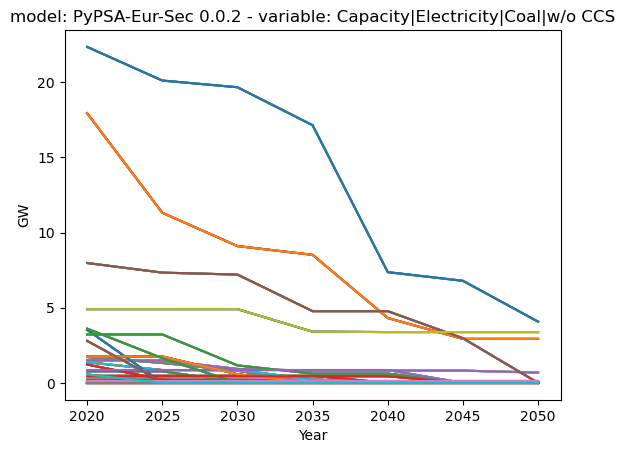

In [20]:

data.plot()